**ANISh**

In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [24]:
tf.test.is_built_with_cuda()

False

In [25]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
X_test.shape

(10000, 32, 32, 3)

In [28]:
y_train.shape

(50000, 1)

In [29]:
y_test.shape

(10000, 1)

In [30]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [31]:
X_train[0].shape


(32, 32, 3)

In [32]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [33]:
y_train[201]

array([1], dtype=uint8)

In [34]:
def plot_sample(index):
    plt.figure(figsize= (10,1))
    plt.imshow(X_train[index])
    
    

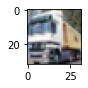

In [35]:
plot_sample(1)

In [36]:
y_train[1]

array([9], dtype=uint8)

In [37]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255
X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [38]:
y_train[:8]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7]], dtype=uint8)

In [39]:
# we are making hot vector for this we use categorical loss function 1,0,0,0,0
# when we have discrete value then we use sparse categorical loss function like 1,2,4,5,2,5

In [40]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype = 'float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10 , dtype= 'float32'
)

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000 , activation = 'relu'),
    keras.layers.Dense(1000 , activation = 'relu'),
    keras.layers.Dense(10 ,activation = 'sigmoid')
    
     
])

model.compile(optimizer='SGD', 
             loss= 'categorical_crossentropy', 
             metrics =['accuracy'])

model.fit(X_train_scaled , y_train_categorical , epochs = 5)


Epoch 1/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.8092 - accuracy: 0.3556
Epoch 2/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.6224 - accuracy: 0.4281
Epoch 3/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.5390 - accuracy: 0.4589
Epoch 4/5
1563/1563 [==============================] - 109s 69ms/step - loss: 1.4775 - accuracy: 0.4811
Epoch 5/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4295 - accuracy: 0.4967


In [43]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 7s 19ms/step


3

In [44]:
model.evaluate(X_test_scaled , y_test_categorical)

313/313 [==============================] - 7s 20ms/step - loss: 1.4608 - accuracy: 0.4805


[1.4607669115066528, 0.4805000126361847]

In [52]:
X_test_scaled[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

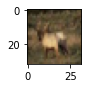

In [53]:
plot_sample(3)